In [15]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import datetime
sb.set()


# Relationship between the Place of Purchase and Types of Products Purchased

In [16]:
def removeOut(dataframe):
    altered = pd.DataFrame() 
    for var in dataframe: 
        Q1 = dataframe[var].quantile(0.25) 
        Q3 = dataframe[var].quantile(0.75) 
        IQR = Q3 - Q1 
        altered[var] = dataframe[var][((dataframe[var] > (Q1 - 1.5 * IQR)) & (dataframe[var] < (Q3 + 1.5 * IQR)))] 
        altered = altered.dropna()
    return altered

In [17]:
def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

In [18]:
customerDf = pd.read_csv("https://raw.githubusercontent.com/dcjh/1015_Mini_Project/main/Datasets/cleaned_customer.csv") 

In [19]:
places_df = customerDf.loc[:, ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Dt_Customer', 'Recency']]

## Factoring the average purchases per month 

**This improves the fairness of data with respect to the date customer joined as a member**

In [20]:
places_df['Dt_Customer'] = pd.to_datetime(places_df['Dt_Customer'], format='%d-%m-%Y')
places_df["CurrentDate"] = datetime.datetime(2021, 1, 1)
places_df['numMonths'] = ((places_df['CurrentDate'] - places_df['Dt_Customer'])/np.timedelta64(1, 'M'))
places_df['Recency'] = places_df['Recency']/30 #assume 30days in a month

In [21]:
#average purchases over the months
for var in places_df.columns[3:9]:
    places_df[var] = places_df[var]/ (places_df["numMonths"] - places_df["Recency"])

places_df.drop(columns = ['Dt_Customer', 'CurrentDate', "numMonths", "Recency"], inplace = True)

In [22]:
places_df

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,8,10,4,6.481022,0.898157,5.572659,1.755490,0.898157,0.898157
1,1,1,2,0.136519,0.012411,0.074465,0.024822,0.012411,0.074465
2,8,2,10,4.867850,0.559917,1.451213,1.268383,0.239964,0.479929
3,2,0,4,0.134427,0.048882,0.244412,0.122206,0.036662,0.061103
4,5,3,6,2.154818,0.535591,1.469760,0.572957,0.336301,0.186834
...,...,...,...,...,...,...,...,...,...
2211,9,3,4,7.956164,0.482532,2.042344,0.471310,1.324157,2.771753
2212,8,2,5,5.280512,0.000000,0.390186,0.000000,0.000000,0.104049
2213,2,3,13,11.323378,0.598593,2.706138,0.399062,0.149648,0.299296
2214,6,5,10,5.157396,0.361500,2.578698,0.963999,0.361500,0.735049


**We can see that the dataset is then cleaned after the averaging process**

In [23]:
places_df.describe()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,4.085289,2.671029,5.800993,3.434783,0.298550,1.889912,0.425897,0.305814,0.494776
std,2.740951,2.926734,3.250785,3.774008,0.453732,2.540929,0.621686,0.466487,0.584823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.277336,0.020148,0.178176,0.031087,0.012748,0.103556
50%,4.000000,2.000000,5.000000,1.982401,0.091109,0.756134,0.135817,0.095060,0.274890
75%,6.000000,4.000000,8.000000,5.736124,0.369209,2.608185,0.559684,0.385290,0.639012
max,27.000000,28.000000,13.000000,17.179104,2.451923,20.074911,3.262791,3.321490,3.693851


NumWebPurchases Skew: 1.1970370130708343
NumCatalogPurchases Skew: 1.8810750511540515
NumStorePurchases Skew: 0.7018262973284631


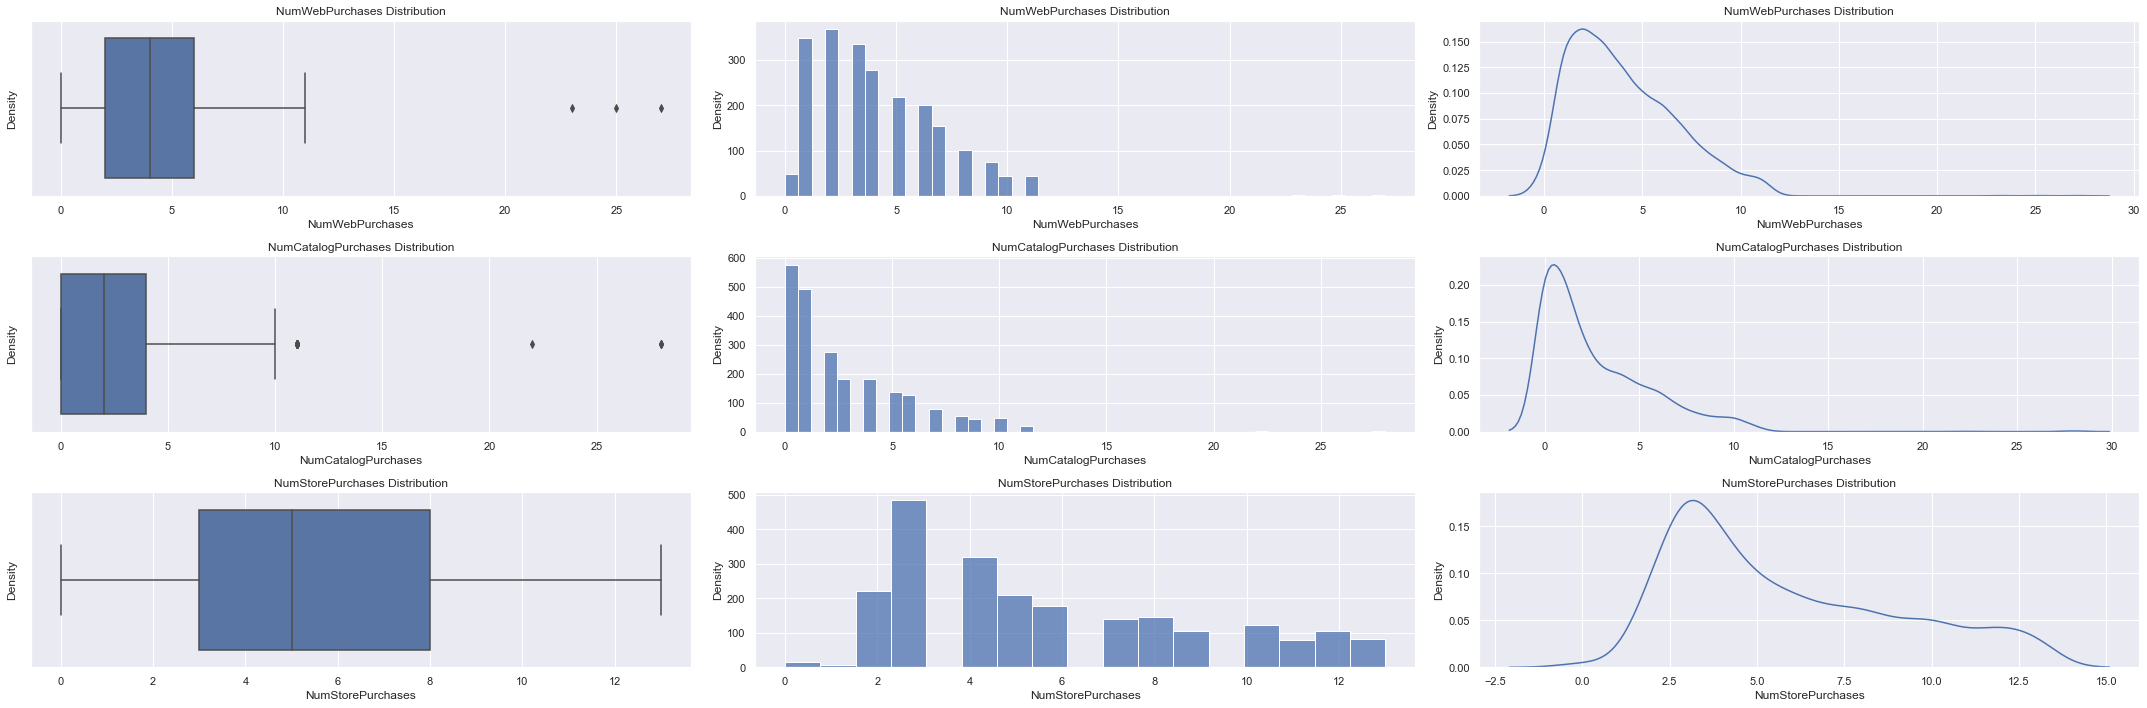

In [24]:
f, axes = plt.subplots(3, 3, figsize=(30,10))
columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
for i, col in enumerate(columns):
    sb.boxplot(x = places_df[col], ax=axes[i, 0])
    sb.histplot(x = places_df[col], ax=axes[i, 1])
    sb.kdeplot(x = places_df[col], ax=axes[i, 2])
    for j in range(3):
        axes[i, j].set_title(f'{col} Distribution')
        axes[i, j].set_xlabel(col)
        axes[i, j].set_ylabel('Density')
    print(f'{col} Skew: {places_df[col].skew()}')

plt.tight_layout()
plt.show()



In [25]:
places_cleaned = removeOut(places_df)

NumWebPurchases Skew: 0.9867281526904731
NumCatalogPurchases Skew: 1.7297672515149696
NumStorePurchases Skew: 1.178599806732214


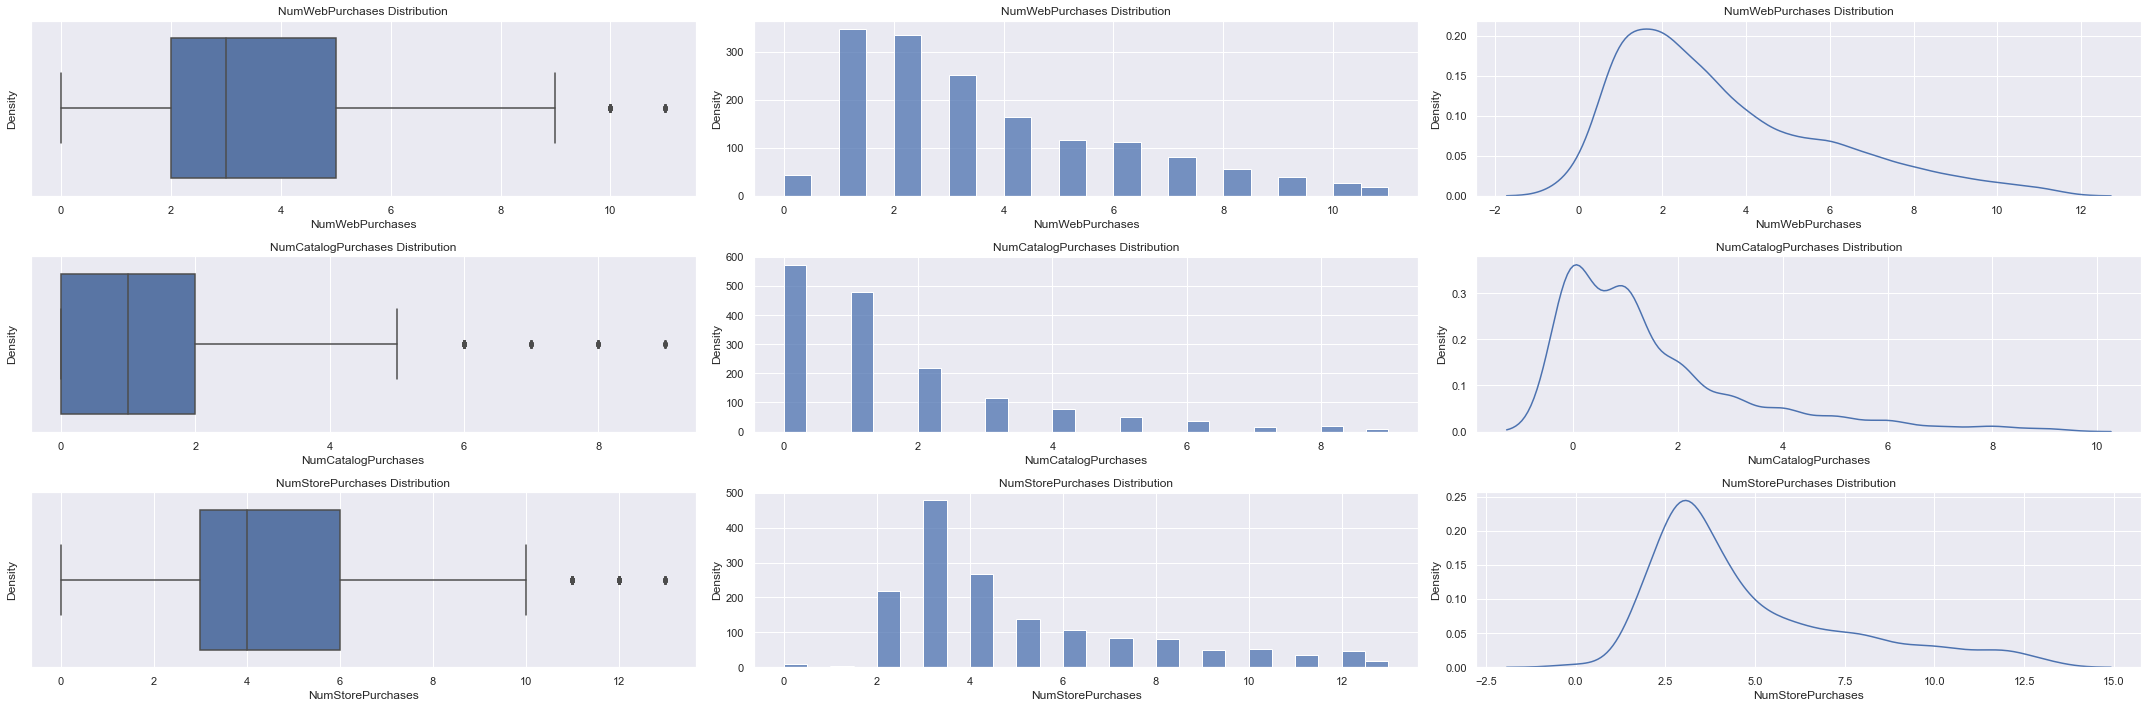

In [26]:
f, axes = plt.subplots(3, 3, figsize=(30,10))
columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
for i, col in enumerate(columns):
    sb.boxplot(x = places_cleaned[col], ax=axes[i, 0])
    sb.histplot(x = places_cleaned[col], ax=axes[i, 1])
    sb.kdeplot(x = places_cleaned[col], ax=axes[i, 2])
    for j in range(3):
        axes[i, j].set_title(f'{col} Distribution')
        axes[i, j].set_xlabel(col)
        axes[i, j].set_ylabel('Density')
    print(f'{col} Skew: {places_cleaned[col].skew()}')

plt.tight_layout()
plt.show()

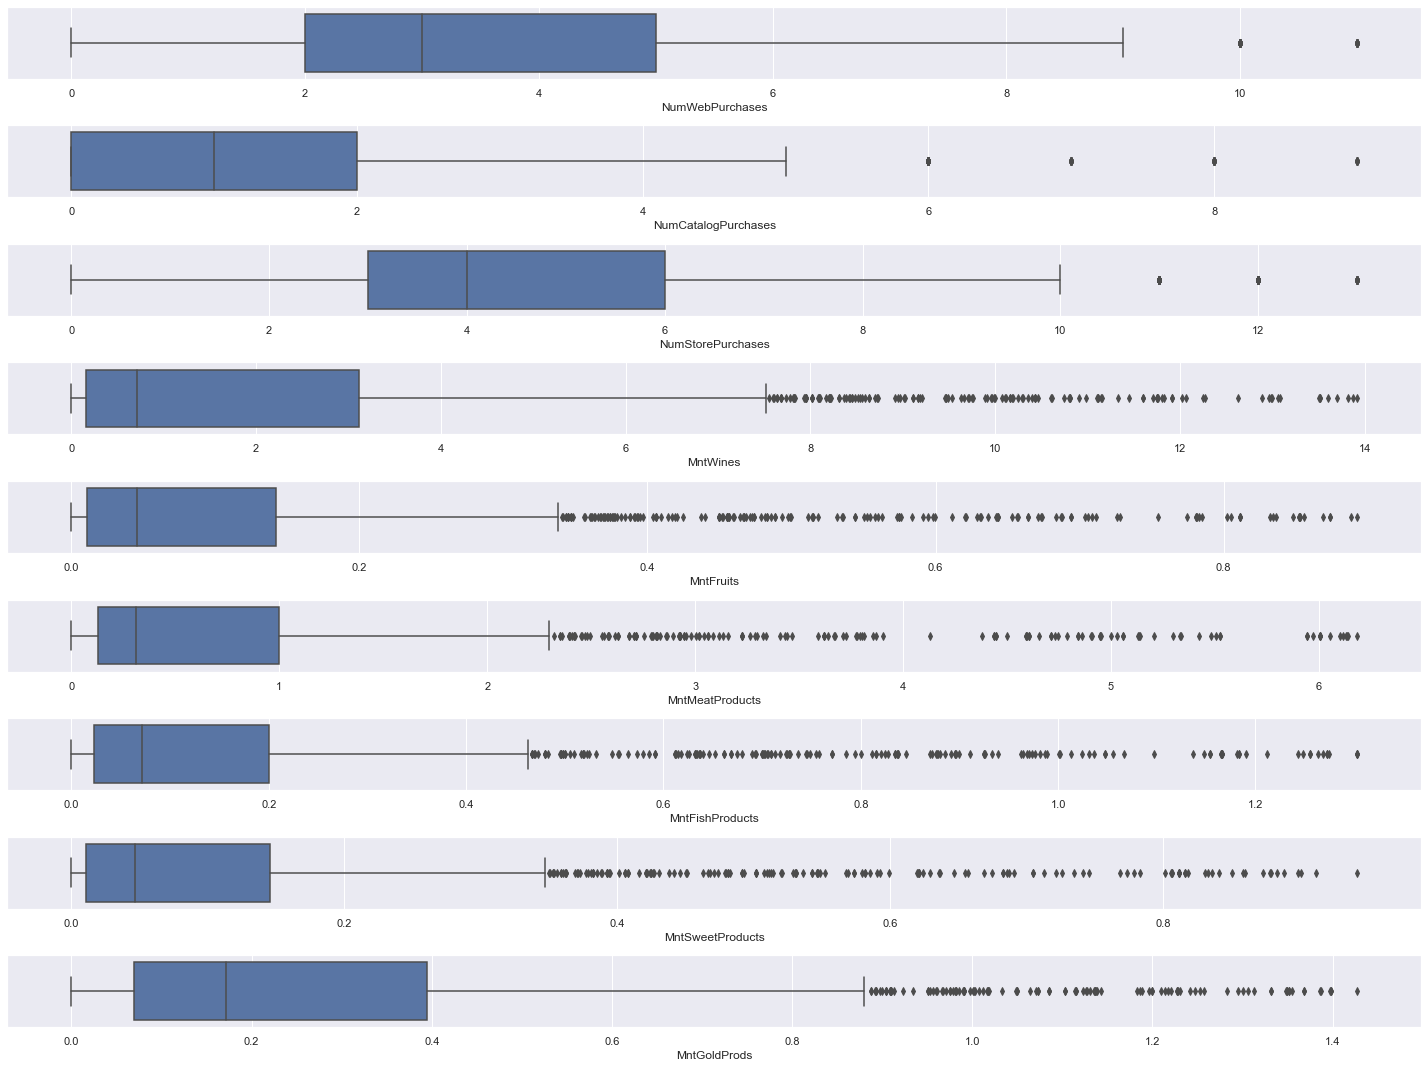

In [27]:
f, axes = plt.subplots(9, figsize=(20,15))

count=0
for var in places_cleaned:
    sb.boxplot(x = places_cleaned[var], orient = "h", ax = axes[count])
    count+=1

plt.tight_layout()
plt.show()

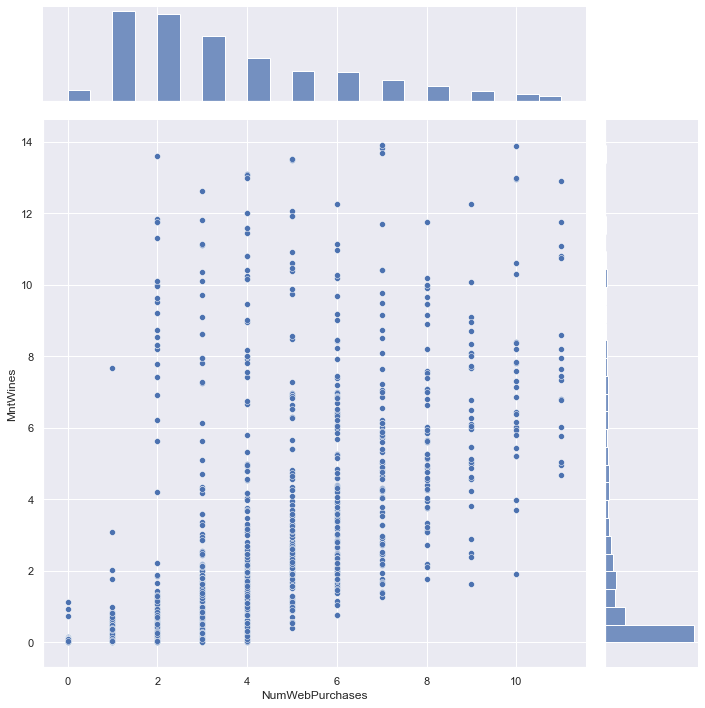

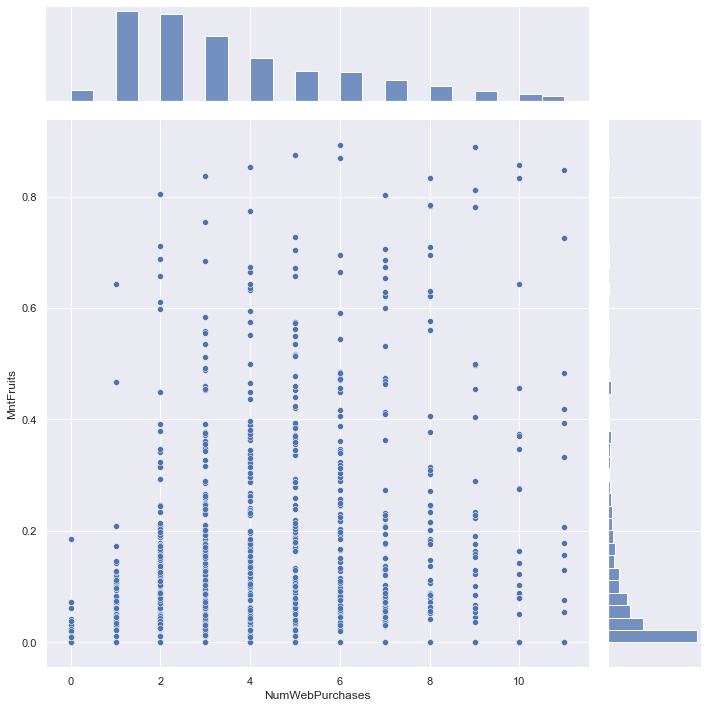

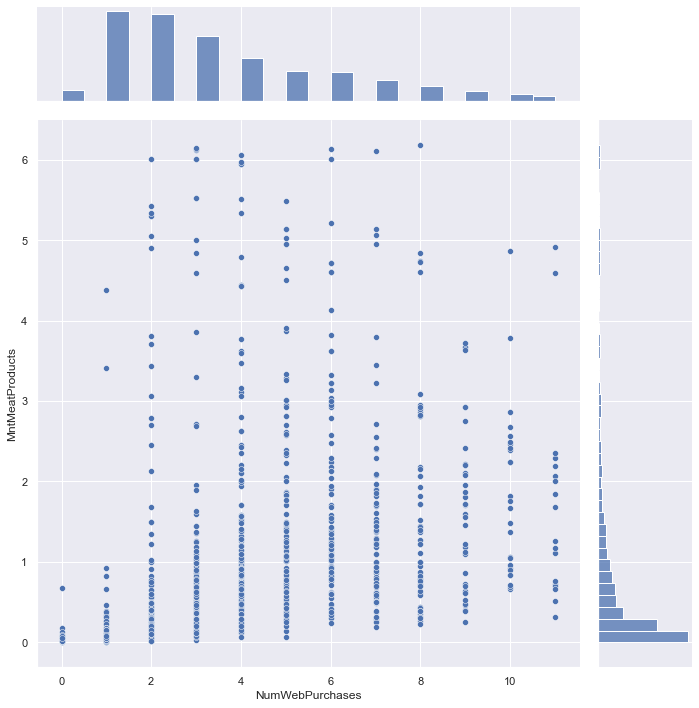

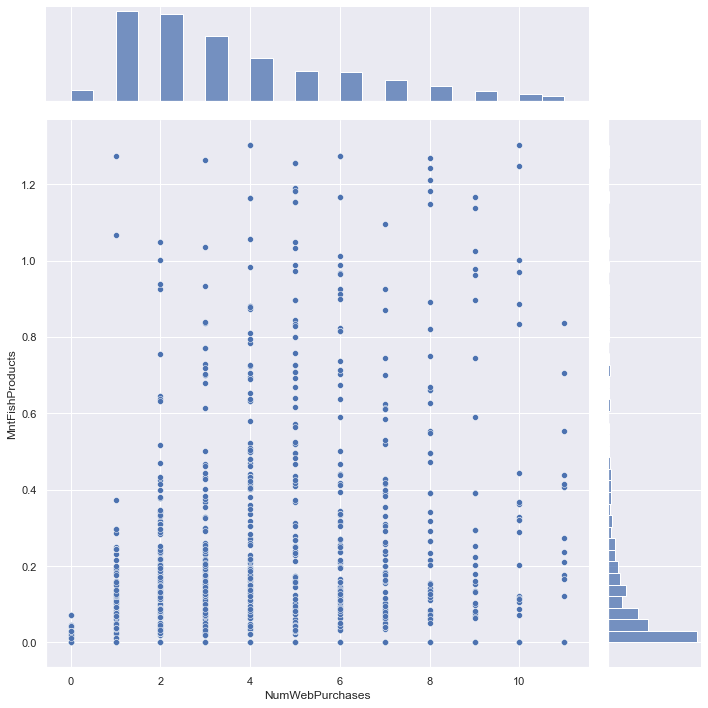

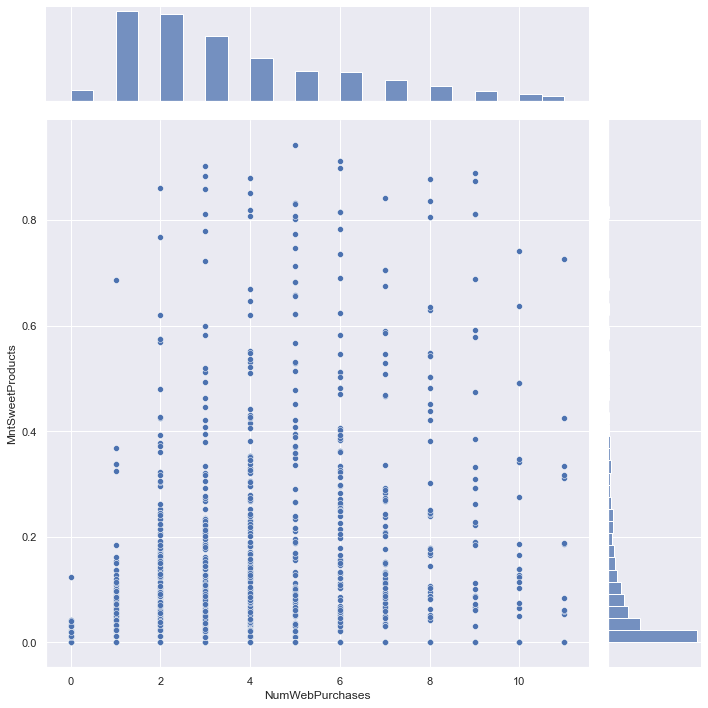

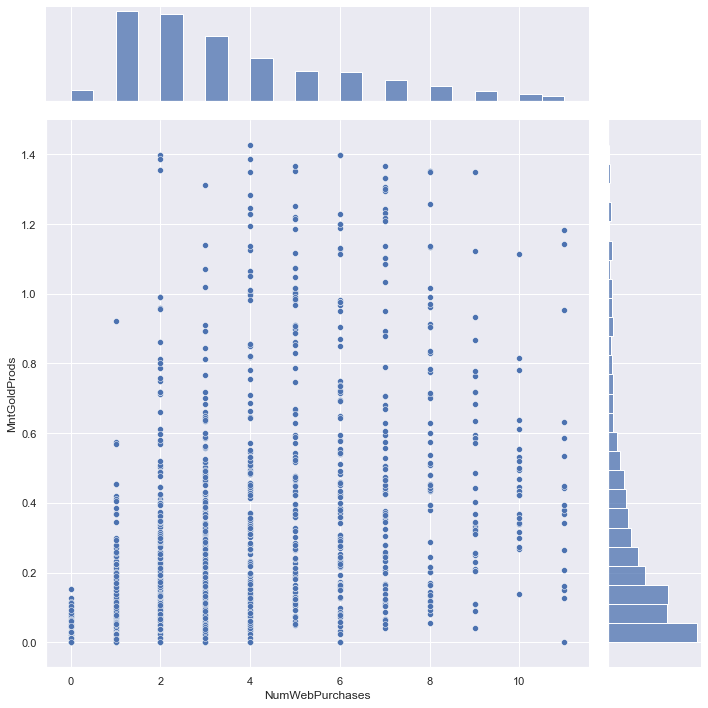

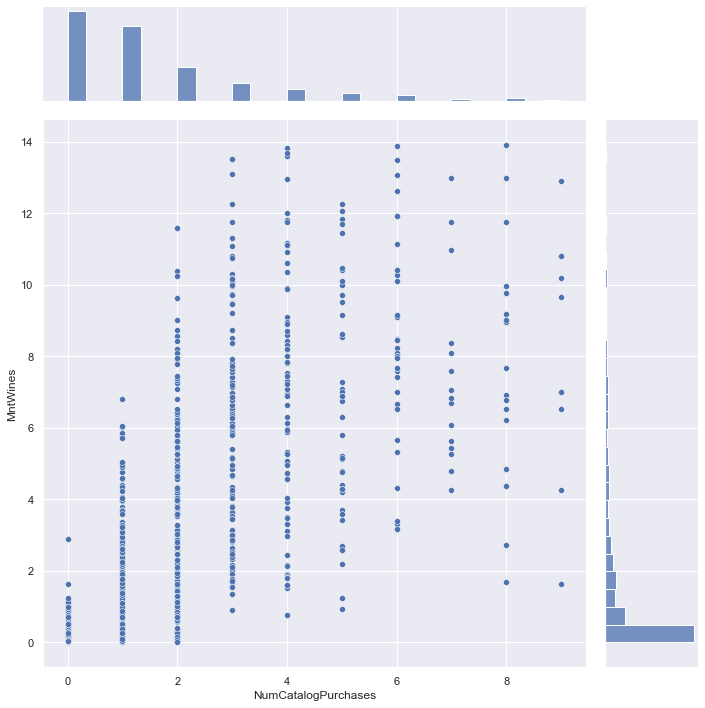

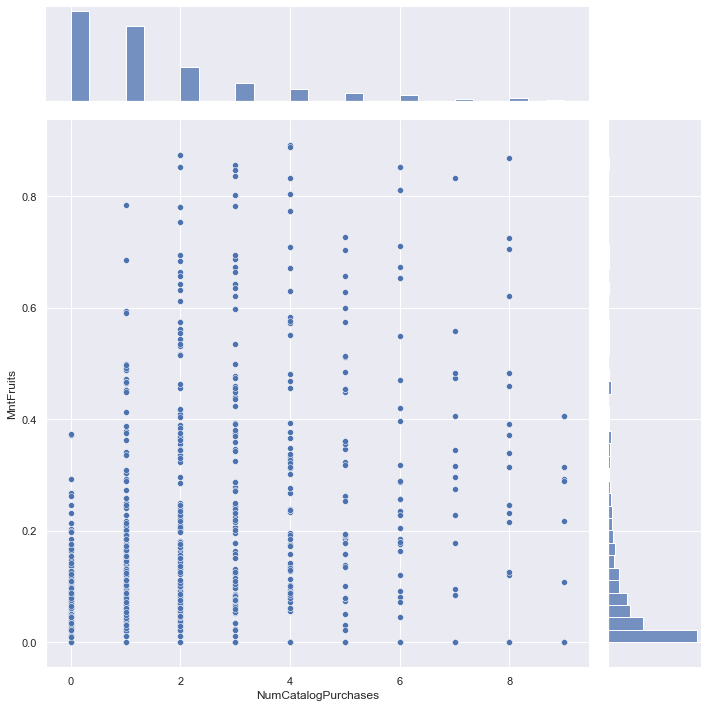

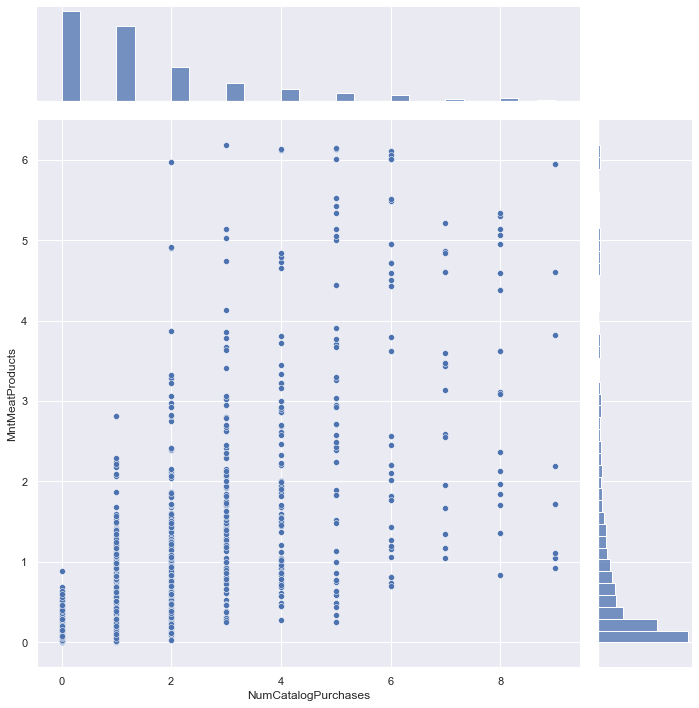

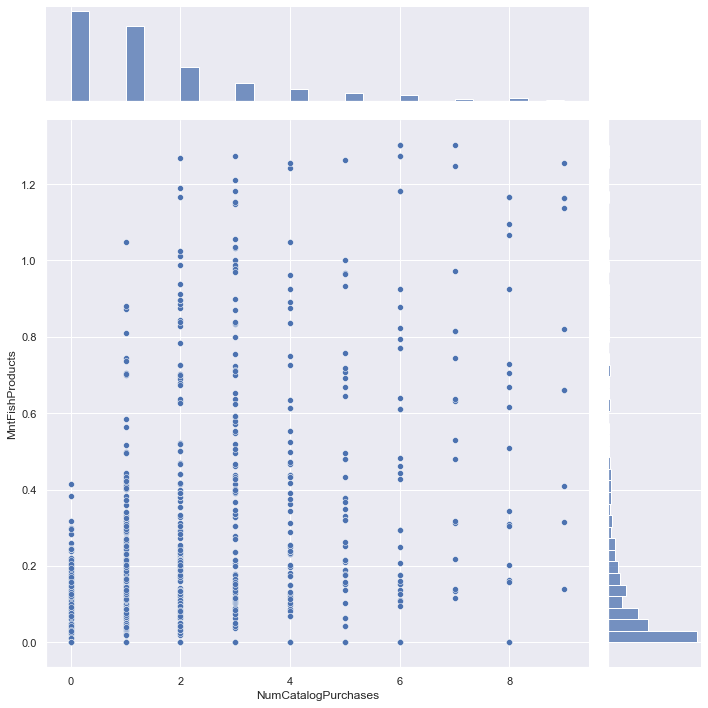

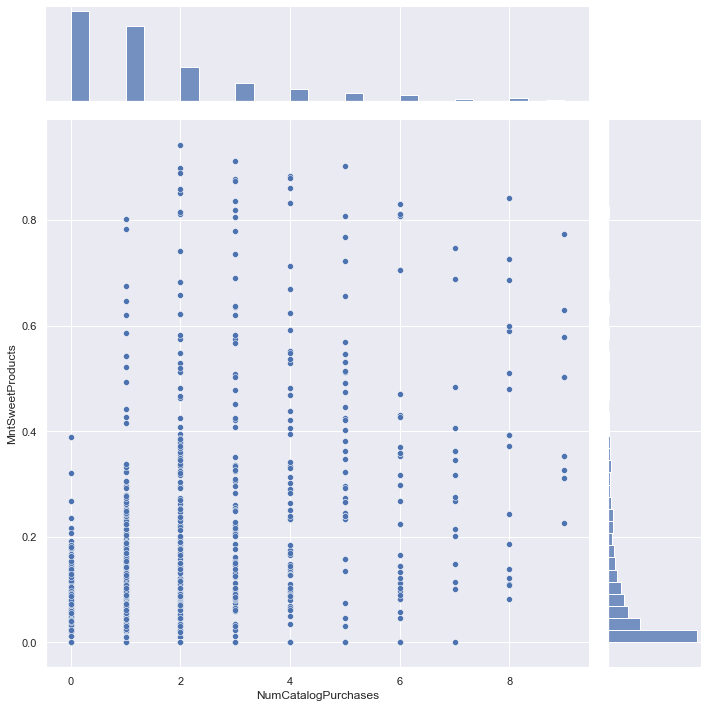

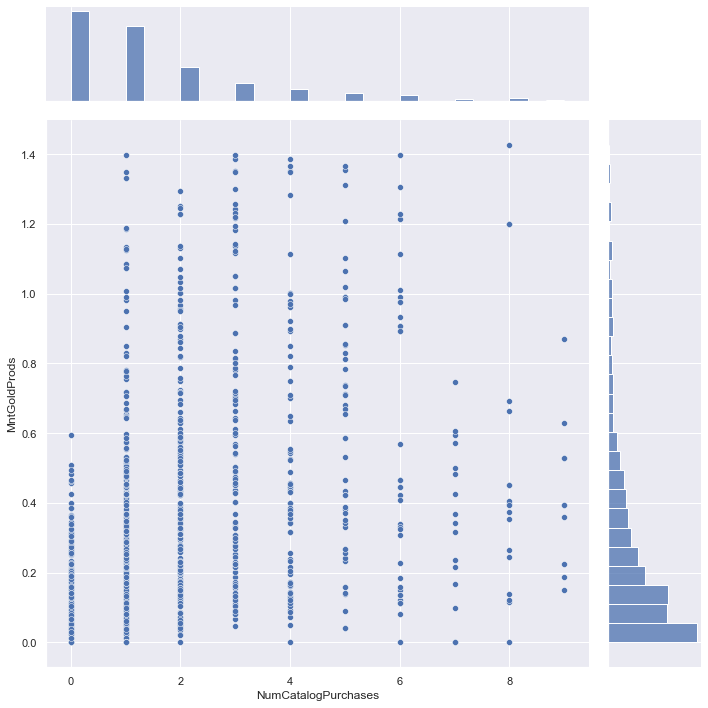

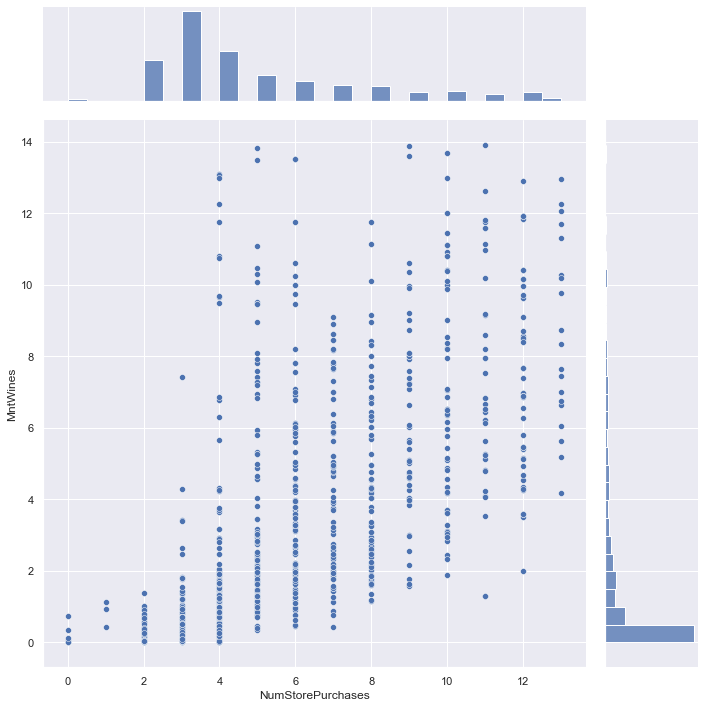

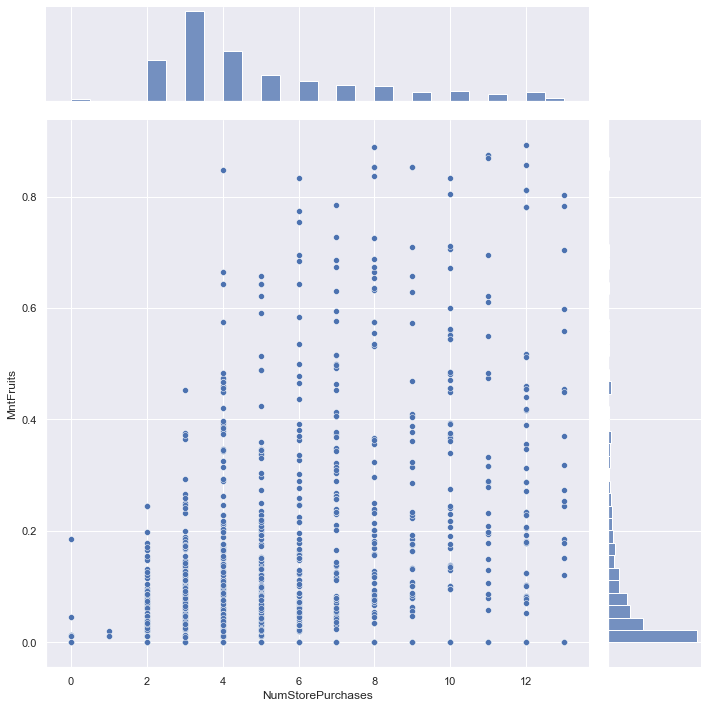

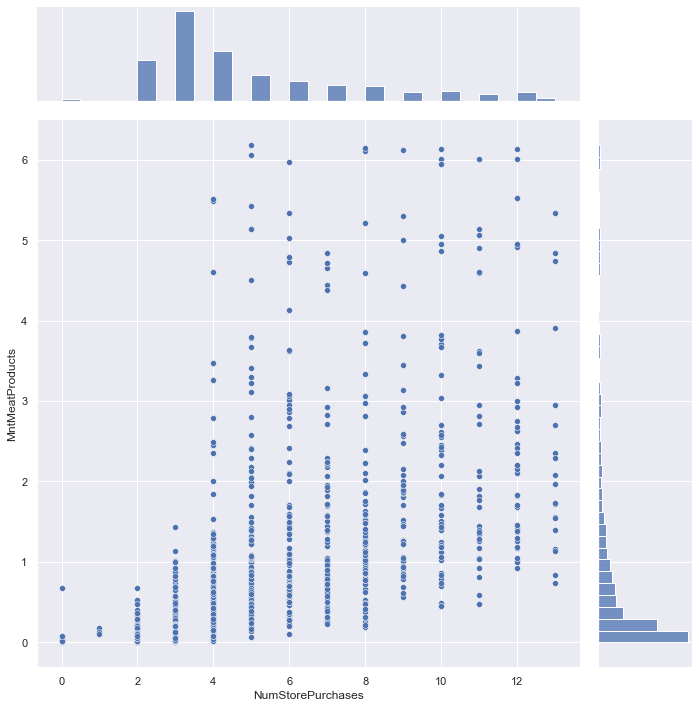

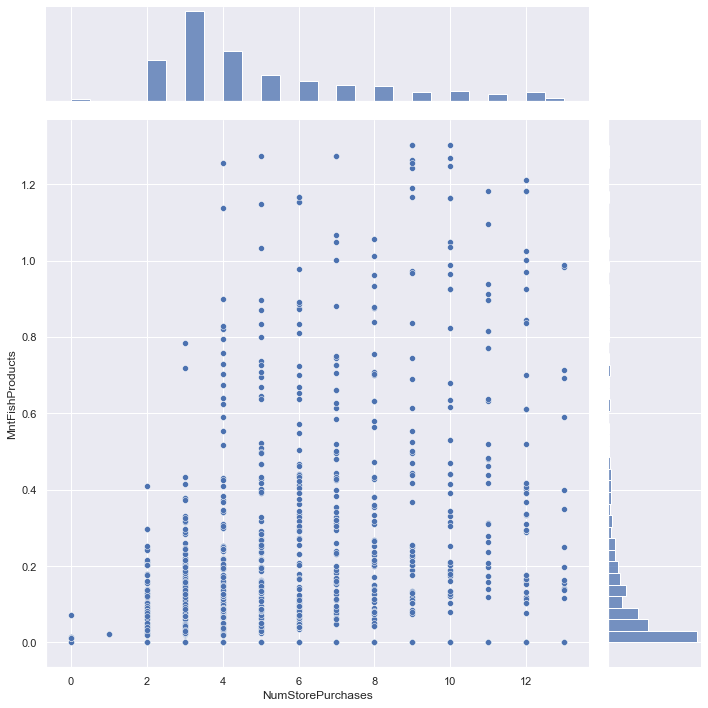

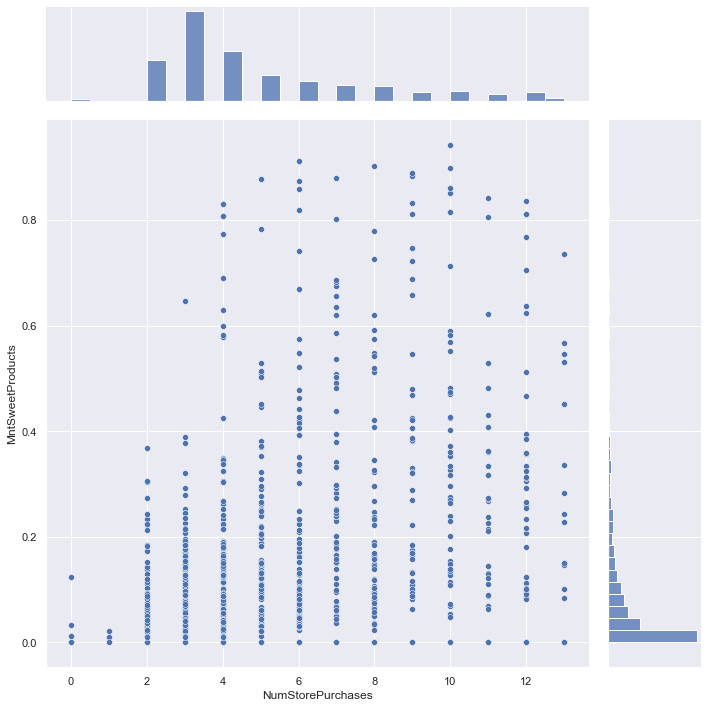

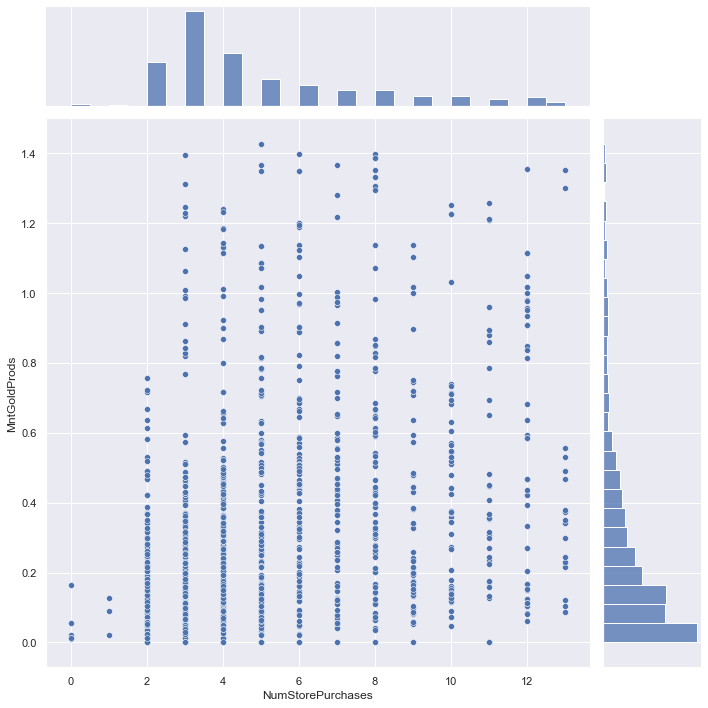

In [30]:
for response in places_cleaned.columns[0:3]:
    for predictor in places_cleaned.columns[3:]:
        sb.jointplot(data = places_cleaned, y = predictor, x = response, height = 10)

plt.tight_layout()
plt.show()

<AxesSubplot:>

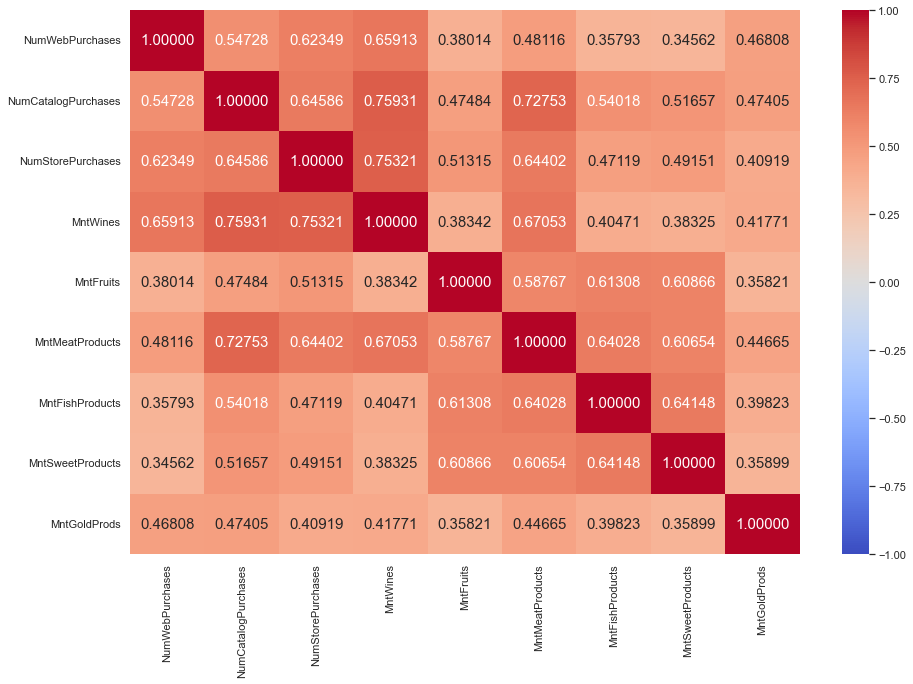

In [29]:
f = plt.figure(figsize=(15, 10))
sb.heatmap(places_cleaned.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".5f", annot_kws = {"size": 15}, cmap='coolwarm')

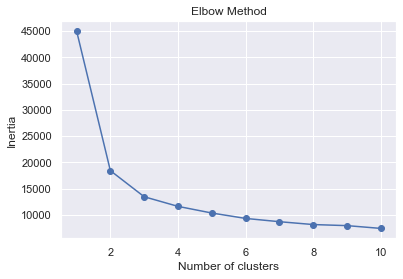

In [31]:
from sklearn.cluster import KMeans

# Calculate inertia for different number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='random', random_state=42)
    kmeans.fit(places_cleaned)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

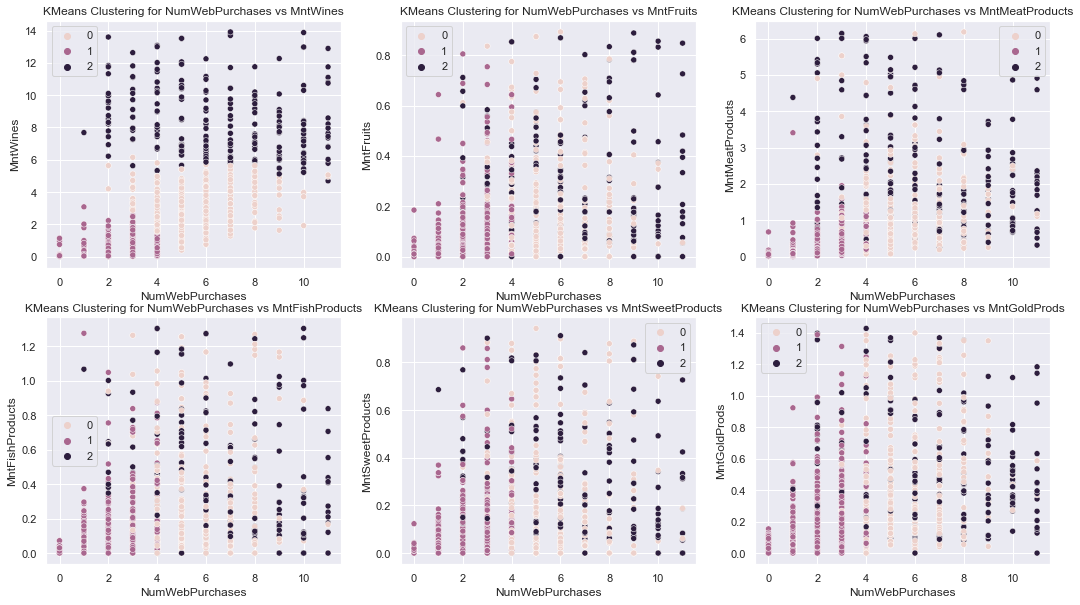

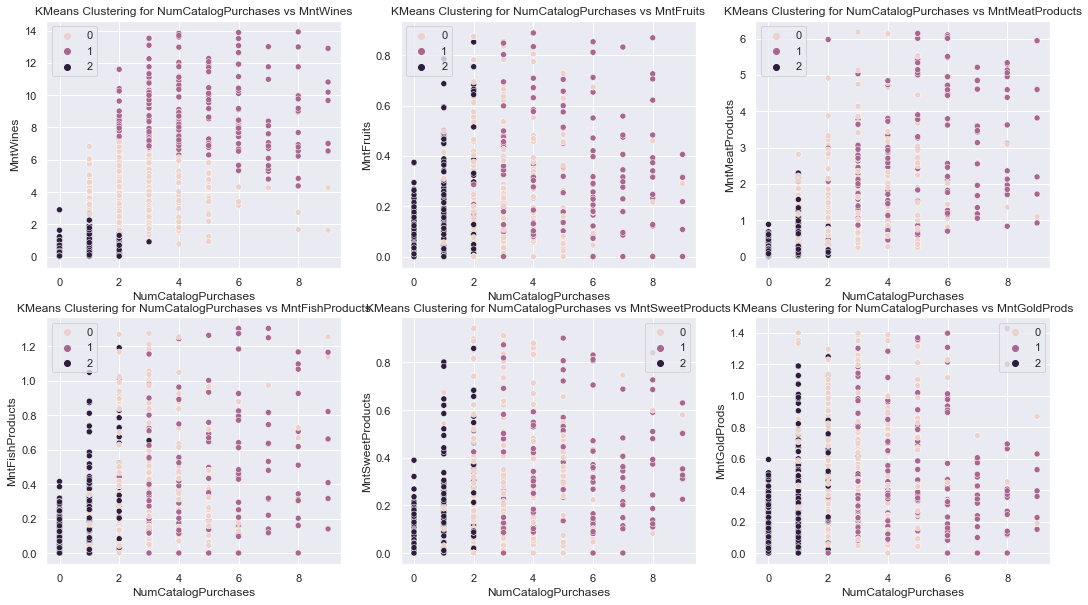

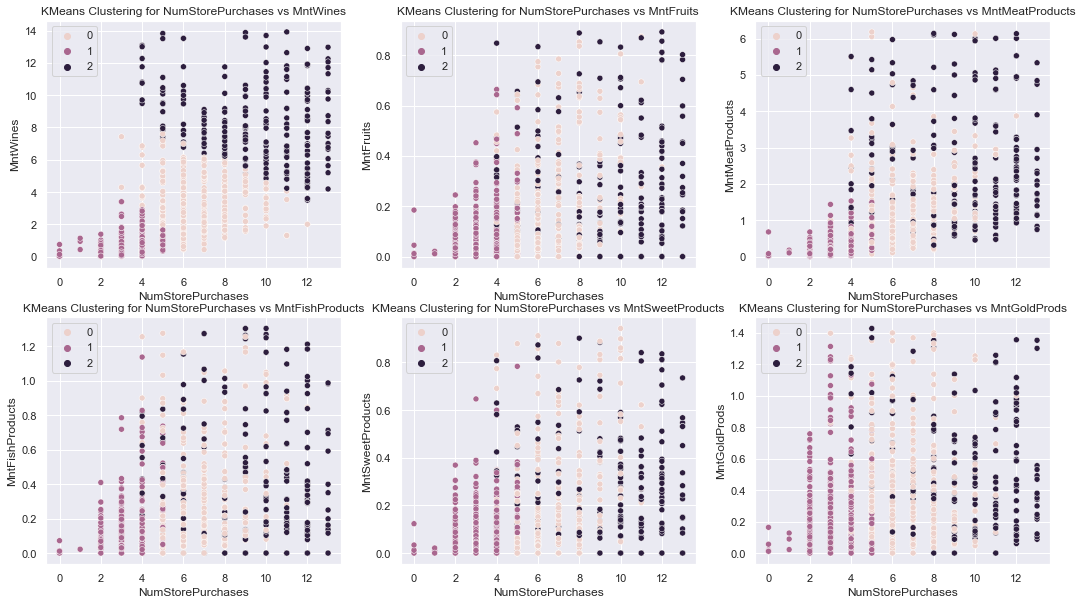

In [32]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

response_variables = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

for predictor_variable in ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    kmeans.fit(places_cleaned[[predictor_variable] + response_variables])
    
    for i, response_variable in enumerate(response_variables):
        row = i // 3
        col = i % 3
        sb.scatterplot(data=places_cleaned, x=predictor_variable, y=response_variable, hue=kmeans.labels_, ax=axes[row, col])
        axes[row, col].set_title(f'KMeans Clustering for {predictor_variable} vs {response_variable}')
        axes[row, col].set_xlabel(predictor_variable)
        axes[row, col].set_ylabel(response_variable)

    plt.show()